# The rightful Data Science workflow  


## Learn  the complete Data Science pipeline while building a real world capstone project.

# PREDICTING STUDENTS PERFORMANCE WITH LINEAR REGRESSION


   

The statistics of the number of data science content on the web.
What makes this unique.

Table of content.  

i. Introducing the problem statement, the objectives and the various libraries to be used for the project.   
ii. Understanding the project through Exploratory Data Analysis.   
iii. Data preprocessing and feature engineering.   
iv. Machine learning section; predictive modelling.  

## 1. Introduction

Linear Regression is unique in that it belongs to the field of Mathematics but it also adapts well to machine learning.
With Linear Regression, we build a model that combines specific set of input numeric values, and its solution being the predicted numeric output. Because we deal with Numeric values, this helps in problems solving scale, number, statistical probability, grades of which student performance evaluation is an essential need. 

### Objectives

**The main goal of this project is to use Linear Regression, a machine learning algorithm to develop a model that will predict the grade of a student based on a given student attributes.** 


we will begin by importing various python libraries that will help us in our data explorations.  

**Data wrangling libraries**

1. `Pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.[Read more about pandas](https://pandas.pydata.org/)
2. `Numpy` is one of the most powerful open source scientific computational tool used by scientist, statisticians and other people in the quantitative field. [You can read about numpy ease-of-use and its magic here](https://numpy.org)    

**Data Visualization libraries**
3. `Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.[Read about matplotlib here](https://matplotlib.org/)  
4. `Seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.[Read more about seaborn](https://seaborn.pydata.org/)


**Model creation and evaluation libraries**
* These libraries with it's operations would  be explained into details as we move along the project.

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# library for model creation
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# model evaluation
from sklearn.metrics import mean_squared_error,r2_score

# silent warnings
import warnings
warnings.filterwarnings('ignore')

The script will add borderlines to the dataframes

In [66]:
%%HTML
<style type='text/css'>
table.dataframe td,table.dataframe th{
    border: 1px solid black !important;
    color: solid black !important
}
</style>

## 2. Exploratory data analysis
We will first of all, have to understand the data and explore how various attributes of each student may directly or indirectly affects his/her score.


The data set is in the `data` subdirectory folder. We will use the pandas `read` method to read both data sets and pass `;` for the `sep` parameter because each column is separated by a semi-colons. 

In [67]:
# read the datasets
stu_mat = pd.read_csv('data/student-mat.csv',sep=';')

stu_por = pd.read_csv('data/student-por.csv',sep=';')

Lets preview the first five of both datasets.  
* we have two different datasets `maths course` and `portuguese language course` each having the same attributes.  
* For simplicity sake, we will combine and analyze both datasets together with the help of pandas `concatenate` method.

In [68]:
stu_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [69]:
stu_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [70]:
# concatenate both datasets 
comb_df = pd.concat([stu_mat,stu_por],axis=0)

### Description of the dataset
* There are $1044$ of data entries with only two distinct schools.
* The percentage of female to male is 53% and 47% respectively
* The average age of a student is $17$ years with 15 years minimum and 22 years maximum.
* A student may averagely,absent hiself/herself twice from school.
* The total number of features are 33 while 16 is integer type and 17 string type

In [71]:
comb_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# comb_df['school']

In [73]:
# comb_df.info()

Let's combine the two datasets and remove duplicate rows by checking it with some list of attributes.
* There are 382 duplicate rows.  
* Now, lets use the pandas `duplicated` method to remove duplicates from the data.
    * The `~` sign simply means the opposite of whatever outcome.  
    * In this context, the sign is used to negate the outcome of boolean values.   
    
**NB:** Since we have combined and got ridden of the duplicate rows, we can now role-in with the exploratory analysis by doing visualization.

In [74]:
# list of students attributes
sim_attr = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]


print('We have {} duplicate rows in the dataset'.format(comb_df[comb_df.duplicated(sim_attr,keep='first')].shape[0]))

# Lets drop the duplicates and maintain its first occurance
df = comb_df[~comb_df.duplicated(sim_attr,keep='first')]

# The shape of the data after dropping duplicates
df.shape

We have 382 duplicate rows in the dataset


(662, 33)

### Data Visualization

#### Let check how `sex` and `age` affects the student's grade.

- In average, male students with the age less than or equal to $19$ years perform better than those more than $20$ years.

- Female students with the age more than $19$ performs far better than those less than or equal to $19$ which is directly opposite to their male mates.

###### Therefore we can say that, the older the age of a female student, the better her performance and the otherwise to male students.

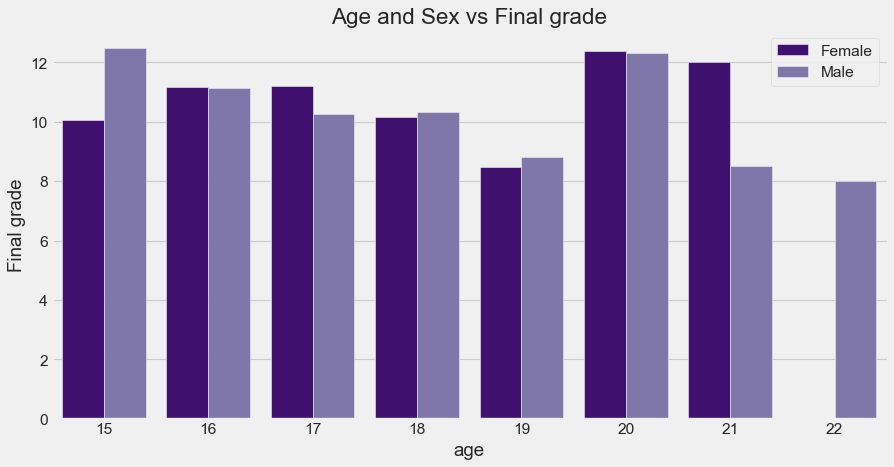

In [75]:
# defining matplotlib figure
plt.figure(figsize=(12,6),dpi=80)

# this is matplotlib colormaps you can get your prefered color from matplotlib.cm.get_cmap
color = plt.cm.Purples_r(np.linspace(0,1,4))

# We use seaborn to create a barplot with x and y axis being age and target variable respectively
ax = sns.barplot(x='age',y='G3',data=df,hue='sex',ci=None,palette=color)

# removing the spines from the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# setting x and y labels 
ax.set_ylabel('Final grade')
ax.set_title('Age and Sex vs Final grade')

# renaming the default legend
plt.legend(labels=('Female','Male'),loc=1)
plt.savefig('age_and_sex.png')

#### Can student relationship status affects his/her grade?
* It observed that both genders with no romantic lives perform much better that those in relationship
* Averagely, Male students perform slightly better than female students in both the romantic status

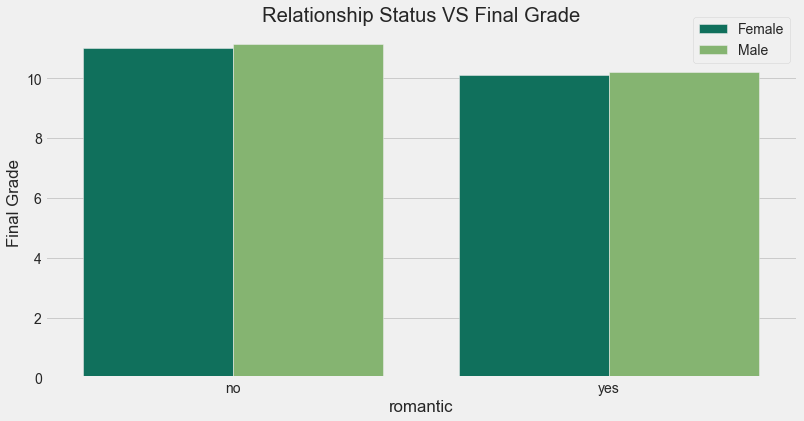

In [76]:
fig,ax = plt.subplots(figsize=(12,6))

pl = sns.barplot('romantic','G3',data=df,hue='sex',ci=None,palette=plt.cm.summer(np.linspace(0, 1, 3)))

ax.set_title('Relationship Status VS Final Grade')
ax.set_ylabel('Final Grade');
ax.legend(labels=('Female','Male'),bbox_to_anchor=(0.1, 1.05, 0.9, 0))
plt.savefig('relationship.png')

#### Is there any impact parental educational level have on students performance.
* Upon visualizing both the Father and Mother educational level, it turned out consistently that, parents with no educational background and those with higher educational background have the best performing students.
* The rest of the students having parents in the other categories performs similarly and lower.

> A study on the Correlation Between Parents’ Education Level and Children’s Success published on the [lamar university website](https://degree.lamar.edu/articles/undergraduate/parents-education-level-and-childrens-success/#:~:text=But%20parents%20influence%20their%20children,high%20value%20on%20educational%20attainment.) shows how significant parents educational level affects their wards performance.

The findings suggest that people whose parents did not hold a degree who entered the workforce straight out of high school were more likely to believe that a college degree was not worth the cost or that they did not need further education to pursue their desired career.  
Parents who didn't get the privilege to attend high school finds it neccessary to encourage their children to go to school and motives them to go extra miles on what they couldn't do.

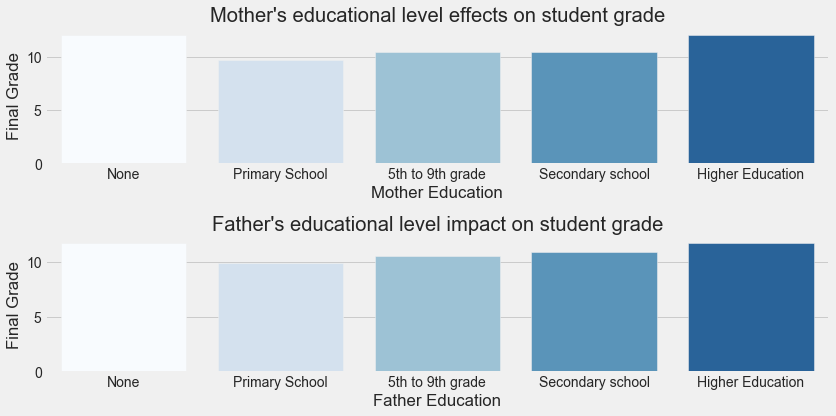

In [77]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,6))

sns.barplot('Medu','G3',data=df,ci=None,palette=plt.cm.Blues(np.linspace(0, 1, 6)),ax=ax1)
sns.barplot('Fedu','G3',data=df,ci=None,palette=plt.cm.Blues(np.linspace(0, 1, 6)),ax=ax2)

x_labels = ['None','Primary School','5th to 9th grade','Secondary school','Higher Education']

ax1.set_title("Mother's educational level effects on student grade")
ax1.set_ylabel('Final Grade')
ax1.set_xlabel('Mother Education')
ax1.set_xticklabels(x_labels)

ax2.set_title("Father's educational level impact on student grade")
ax2.set_ylabel('Final Grade')
ax2.set_xlabel('Father Education')
ax2.set_xticklabels(x_labels)

plt.tight_layout();
plt.savefig('parent.png')

#### How does financial needs of a student affects his/her grade?
* The simple heatmap below shows that student with both family supports and school support tend to perform lower than all the other categories.  


Kirabo Jackson, a professor at Northwestern University, has [published several studies](https://www.carolinajournal.com/news-article/does-more-money-for-education-lead-to-better-student-performance/) showing a connection between higher spending and improved education outcomes. His research has shown additional funding to low-wealth school districts can make a difference in student performance. Wealthier school districts don’t benefit as much with an extra influx of cash.

* It is also surprising that, students with no financial support performs extremely better securing the second highest position on the map. This may be as a results of other non-physical factors such as commitment and determination to make a difference.

> We can conclude that lack of finance in this case is not a major contributor to students performance.

**map**  
i.Define a matplotlib figure  
ii. Use the `pivot_table` method to create an excel style pivot table.  
iii. Plot the heatmap and apply the necessary arguments.  
iv. Set the various labels

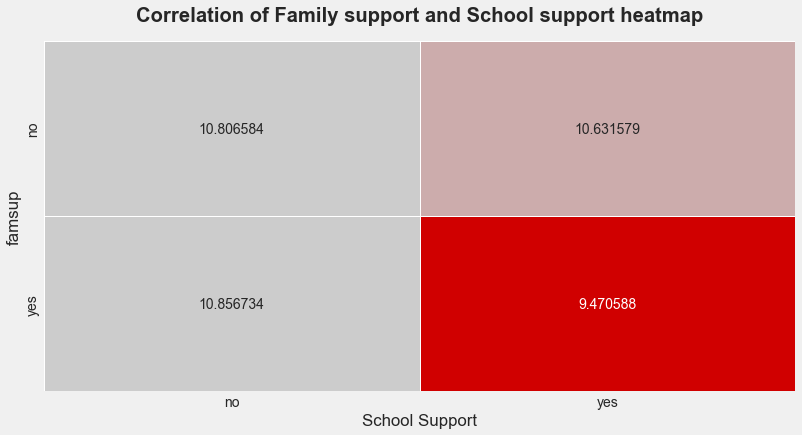

In [78]:

plt.figure(figsize=(12,6))

sup_corr = pd.pivot_table(df,values='G3',index='famsup',columns='schoolsup',aggfunc='mean')

# Plot a heatmap
ax = sns.heatmap(sup_corr,annot=True,center=0,cbar=False,cmap='nipy_spectral',fmt='f',linewidths=0.5)

# add title to the plot
plt.title('Correlation of Family support and School support heatmap',pad=20,fontweight='bold')

#add axis labels
ax.set_xlabel('School Support')
ax.set_ylabel=('Family Support');
plt.savefig('family.png')

# Section Two: Data Preprocessing and Feature Engineering.
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

#### Why feature engineering

##### Better features means flexibility.

You can choose “the wrong models” (less than optimal) and still get good results. Most models can pick up on good structure in data. The flexibility of good features will allow you to use less complex models that are faster to run, easier to understand and easier to maintain. This is very desirable.

##### Better features means simpler models.

With well engineered features, you can choose “the wrong parameters” (less than optimal) and still get good results, for much the same reasons. You do not need to work as hard to pick the right models and the most optimized parameters.

With good features, you are closer to the underlying problem and a representation of all the data you have available and could use to best characterize that underlying problem.

##### Better features means better results.

The algorithms we used are very standard for Kagglers.We spent most of our efforts in feature engineering.  
Xavier Conort, on “Q&A with Xavier Conort” on winning the Flight Quest challenge on Kaggle.

Lets check the shape of the dataframe.


In [79]:
df.shape

(662, 33)

### *Lets begin with binarization,descritization and normalization of data set*

### `age feature`
* We will then create `age_bin` feature by grouping the age into `teenager`,`youg_adult` and `adult`.
* we will create `vote_age` a binary feature showing wheather student is elligible to vote or not.
* We will then create `is_teenager` feature. This binary feature shows either student is a teenager or not.  
The `cut` method categorizes the continous values into a given range.

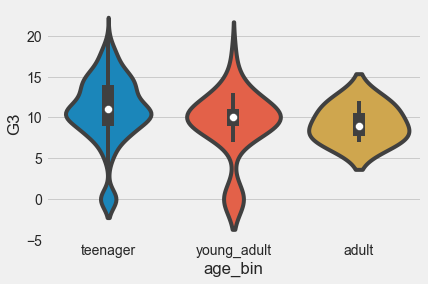

In [80]:
# break the age into categories according to a given range
df.loc[:,'age_bin'] = pd.cut(x=df['age'],bins=[-np.inf,18,20,np.inf],labels=['teenager','young_adult','adult'])

# Lets visualize the effect of the categorized age on the target variable
sns.violinplot('age_bin','G3',data=df);
plt.savefig('age.png')

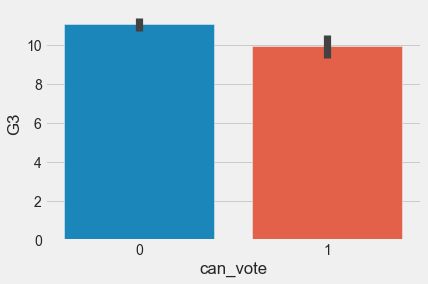

In [81]:
# Create a binary feature making true for those greater or equal to >= 18 and false the otherwise
df.loc[:,'can_vote'] = (df['age']>=18).astype(int)

sns.barplot('can_vote','G3',data=df);

# You are teenager if your age is less than or equal to 19
df.loc[:,'is_teenager'] = (df['age']<=19).astype(int)

# sns.barplot('is_teenager','G3',data=df);
plt.savefig('age2.png')

### `Medu`and `Fedu` feature
numeric: 0 - none  
1 - primary education (4th grade)  
2 – 5th to 9th grade  
3 – secondary education  
4 – higher education)  
* We will derive a feature called `higher_edu` to contain boolean of either the parent attended secondary education or not.
* The higher the parent education, the higher their ward grade our observation.

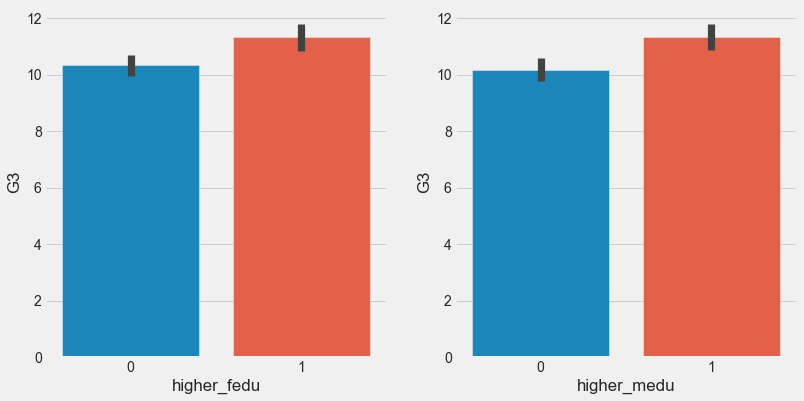

In [82]:
# Create the two features
df.loc[:,'higher_fedu'] = (df['Fedu']>2).astype(int)
df.loc[:,'higher_medu'] = (df['Medu']>2).astype(int)

# Lets visualize the two newly created features against the target variable
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.barplot('higher_fedu','G3',data=df,ax=ax[0])

sns.barplot('higher_medu','G3',data=df,ax=ax[1])
plt.savefig('medu.png',bbox_inches='tight')

### `Fjob` and `Mjob` feature
* Create the `Fjob_cat` feature combining the `at_home`,`teacher`,`health` into one category
* We will leave the `Mjob` as-is

In [83]:
# df['Fjob'].value_counts().plot(kind='bar');

In [84]:
# use lambda expression to create category of three;'other','services' and 'employee'
df.loc[:,'Fjob_cat'] = df['Fjob'].apply(lambda x: x if (x == 'other' or x == 'services') else 'employee')


`guardian` feature
* We will create `has_parent`; a boolean feature of student having or not having a parent.
* We could see that those having their parents as their guardians performs much better than those without.

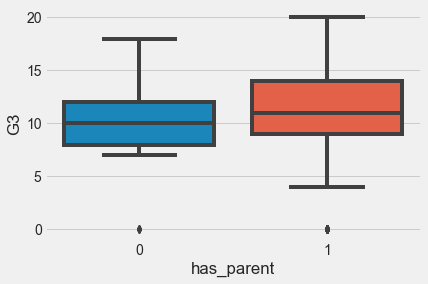

In [85]:
# creating their feature
df.loc[:,'has_parent'] = df['guardian'].apply(lambda x: True if (x=='mother' or x =='father') else False).astype(int)

# plot
sns.boxplot('has_parent','G3',data=df);
plt.savefig('guardian.png',bbox_inches='tight')

### `absence` feature

*We will use discretization to form a new feature named `absent_cat`*  
*We will create `absented` feature which will be a binary feature representing either a student once absented or not.*

In [86]:
# Create categories of absence
df.loc[:,'absent_cat'] = pd.cut(x=df['absences'],bins=[-np.inf,0,5,10,np.inf],
                                                labels=['no_abs','low','moderate','high'],right=True)

# create the binary feature
df.loc[:,'absented'] = (df['absences']>0).astype(int)


### Label encoding Ordinal-Categorical variables  

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering

In [87]:
# list of features to label encode
label_encode_feats = ['famsize','studytime','traveltime','freetime','age_bin','absent_cat']

# initialize label encoder
le = LabelEncoder()

for label in label_encode_feats:
    df[label] = le.fit_transform(df[label])

### One-hot-encoding of non-ordinal category
Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

In [88]:
# Select categorical non-ordinal features to one-hot-encode
def select_label(label):
    return label not in (label_encode_feats + ['absences','age','G1','G2','G3']) 


# return selected features
filtered = [i for i in filter(select_label,df.columns.tolist())]

# function to transform data into one-hot-encodings
def get_hot_encode(df):
    encoder_list = list()
#     iterate through the column labels
    for label in filtered:
        encoder_list.append(pd.get_dummies(df[label],prefix=label,drop_first=True))
        
    return encoder_list


# initialize and transform the dataset with the function
hot_encoded = get_hot_encode(df)

df = pd.concat([df,*hot_encoded],axis=1).drop(filtered,axis=1)

## Continuous Variables

 ### Handling skewness and outliers in countinous variables
 In statistics, an outlier is an observation point that is distant from other observations.
 We wouldn't want to have outliers in our dataset since that have significant effects on the model performance.
 
 So we will first of all, visualize the `continous variables` then we will decide either to cap it or remove it with statistical method.
 
 * Some data beyond the age $21$ appears to be an outlier.
 * The distribution of the number of absences is positively skewed.
 * On the bottom, plot between G1 and G2 has outlier grades.
 

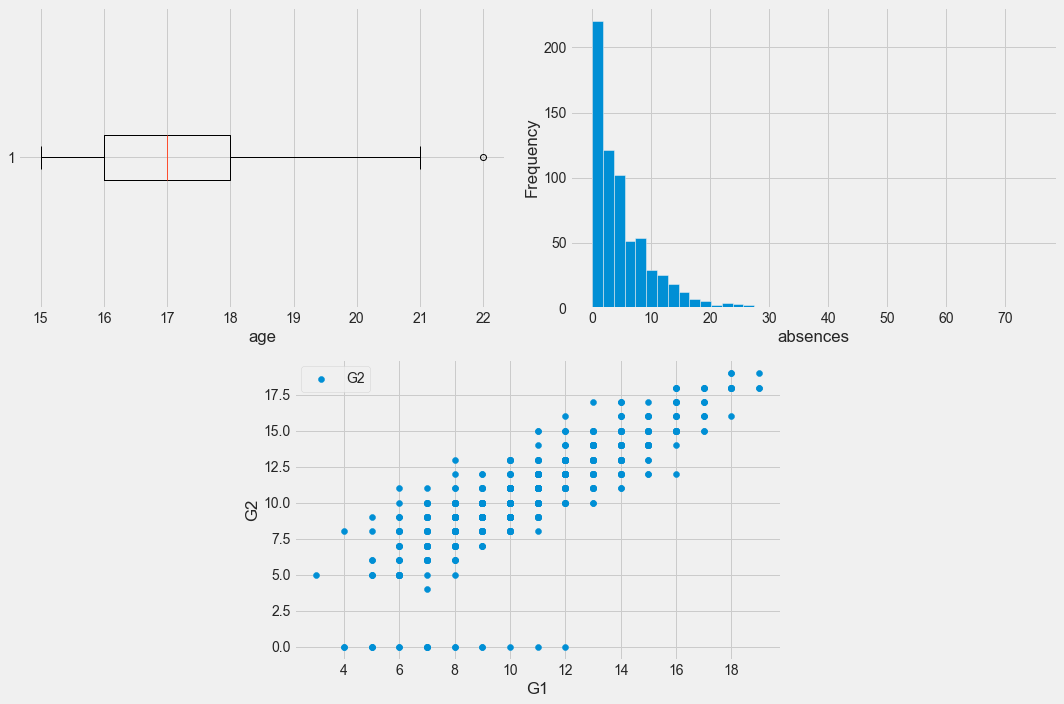

In [89]:
# use gridspec to partition the figure into subplots
plt.figure(figsize=(15,10))
gspec = gridspec.GridSpec(4, 4)

# defining the axes
top_left = plt.subplot(gspec[:2, :2])
top_right = plt.subplot(gspec[:2, 2:])
lower_middle = plt.subplot(gspec[2:, 1:3])

# plot maps
top_left.boxplot(df['age'],vert=False)
top_left.set_xlabel('age')

top_right.hist(df['absences'],bins='auto')
top_right.set_xlabel('absences')
top_right.set_ylabel('Frequency')

lower_middle.scatter('G1','G2',data=df)
lower_middle.set_xlabel('G1')
lower_middle.set_ylabel('G2')

plt.legend(loc='best')
plt.tight_layout()

plt.savefig('skewness.png',bbox_inches='tight')

<!--  #### Handling skewness and outliers
 In statistics, an outlier is an observation point that is distant from other observations.
 We wouldn't want to have outliers in our dataset since that have significant effects on the model performance.
 
 So we will first of all, visualize the `continous variables` then we validate it with some statiscal measurements.
 
 * Some data beyond the age $21$ appears to be an outlier.
 * The distribution of the number of absences is positively skewed.
 * On the bottom, plot between G1 and G2 has outlier grades.
 
As mentioned earlier, we probably should verify this by taking some measurements. Two good metrics we can use are the kurtosis and skew.
where kurtosis measure the height of our distribution and 
skew measures whether it is positively or negatively skewed. We will use the `scipy.stats` module to do the measurements.


***

**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric. -->

It is either we use Z-score function defined in scipy library to detect the outliers or scale our data with `Standardization`.

*The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured*

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.


Standardization

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

**We will use the standard scaling at the model creation time**

## Checking for Multicollinearity

Multicollinearity is the correlation between independent variables. It is considered as disturbance in the data, if present will weaken the statistical power of the regression model.

The Variance Inflation Factor (VIF) is a measure of collinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model’s betas divide by the variance of a single beta if it were fit alone.

 `V.I.F. = 1 / (1 – R^2)`
 
* VIF value <= 4 suggests no multicollinearity 
* VIF value of >= 10 implies serious multicollinearity

In [90]:
df.values

array([[18,  0,  1, ...,  0,  1,  1],
       [17,  0,  0, ...,  0,  1,  1],
       [15,  1,  0, ...,  0,  1,  1],
       ...,
       [18,  1,  2, ...,  0,  1,  0],
       [19,  0,  1, ...,  0,  0,  1],
       [17,  0,  1, ...,  0,  1,  0]], dtype=int64)

In [91]:
# create a dataframe
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

vif['feature'] = df.columns

vif_filter_columns = (vif[vif['vif']>=10].feature.values).tolist()

df = df.drop(vif_filter_columns,axis=1)

# get the copy of preprocessed dataframe
prep_df = df.copy()

# save the preprocessed version to file
prep_df.drop('G3',axis=1).to_csv('data/prep_df.csv',index=False)
# covMat = np.array(covMat, dtype=float)

In [92]:
prep_df

,age,famsize,traveltime,studytime,freetime,absences,G1,G2,G3,age_bin,...,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5,can_vote_1,is_teenager_1,absented_1
0,18,0,1,1,2,6,5,6,6,1,...,0,0,0,0,1,0,0,1,1,1
1,17,0,0,1,2,4,5,5,6,1,...,0,0,0,0,1,0,0,0,1,1
2,15,1,0,1,2,10,7,8,10,1,...,1,0,0,0,1,0,0,0,1,1
3,15,0,0,2,1,2,15,14,15,1,...,0,0,0,0,0,0,1,0,1,1
4,16,0,0,1,2,4,6,10,10,1,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,19,0,1,1,4,0,8,0,0,2,...,0,1,0,0,0,0,0,1,1,0
611,18,0,1,2,1,5,14,14,15,1,...,0,0,0,0,0,1,0,1,1,1
618,18,1,2,1,2,0,16,15,15,1,...,0,1,0,0,0,0,1,1,1,0
632,19,0,1,1,2,4,7,8,9,2,...,0,0,0,0,1,0,0,1,1,1


# 3. MODEL CREATION 

Finally, we have come to the model creation section.

* We will split the data into `train` and `test` using the `train_test_split` method from the scikit-learn library.

>**Sklearn (or Scikit-learn):** Is a Python library that offers various features for data processing that can be used for classification, clustering, and model selection.  
>**Train_test_split:** Is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 

### Train_test_split parameters explained
**X, y:** The first parameter is the dataset you're selecting to use.  
**train_size:** This parameter sets the size of the training dataset.   
**test_size:** This parameter specifies the size of the testing dataset.   
**random_state:** The default mode performs a random split using np.random. Alternatively, you can add an integer using an exact number.  

In [93]:
# drop the target variable
X = prep_df.drop('G3',axis=1)

# get target
y = prep_df['G3']

# calling the splitting function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)


### Scaling the data
This takes into account the standard deviation hence reducing the effect of outliers

In [94]:
# initialize the function
scaler = StandardScaler()

# apply the transformation
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear regression

Linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions.

### `y = wx + b`
`x` represents our input data  
`y` represents our prediction.
`w` is the slope of the line  
`b` is the intercept, that is the value of y when `x = 0`

### *Multivariable regression*

A multi-variable linear regression might look like this:

> ### `f(x,y,z)=w1x + w2y + w3z`

where `w` represents the coefficients, or weights, our model will try to learn.  
The variables `x,y,z` represent the attributes, or distinct pieces of information, we have about each observation.

### *Derivation*  
 $ y = w x + b $   
y = $ ( y^1 y^2 ... y^n )$  
y = $ (w_1x_1^i + w_2x_2^i + w_nx_n^i + b) $

X_train shape = (496, 58) and y_train shape = (496,)
X_test shape = (166, 58) and y_test shape = (166,)


 Dummy train score  0.0
 Dummy test score  -0.01040076083093755


train score  0.8461778266234085
test score  0.9006398918375393


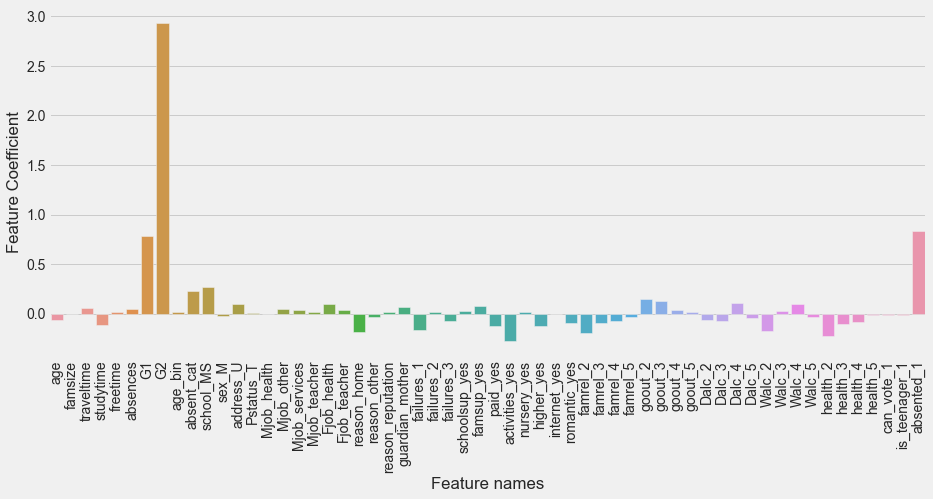

In [97]:
# Check shapes
print('X_train shape = {} and y_train shape = {}'.format(X_train.shape,y_train.shape))
print('X_test shape = {} and y_test shape = {}'.format(X_test.shape,y_test.shape))

# initialize
regression = LinearRegression()

# fit to data
lin_reg = regression.fit(X_train,y_train)

# generate prediction
prediction = lin_reg.predict(X_test)

# use the DummyRegressor as baseline in comparism to the real regressor
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('\n\n Dummy train score ',lm_dummy_mean.score(X_train,y_train))
print(' Dummy test score ',lm_dummy_mean.score(X_test,y_test))

print('\n\ntrain score ',lin_reg.score(X_train,y_train))
print('test score ',lin_reg.score(X_test,y_test))

len(lin_reg.coef_)
X.columns.tolist()
fig,ax = plt.subplots(figsize=(14,6))
sns.barplot(X.columns.tolist(),lin_reg.coef_)
plt.xticks(rotation=90)
plt.ylabel('Feature Coefficient')
plt.xlabel('Feature names')
# plt.savefig('feature_imp.png')
plt.savefig('feature_imp.png',bbox_inches='tight')

# Model Evaluation

### `mean_squared_error`

`MSE` measures the average squared difference between an observation’s actual and predicted values. The output is a single number representing the cost, or score, associated with our current set of weights.

In [98]:
print('test mse ',mean_squared_error(y_test,prediction))

print('\n\n dummy test mse ',mean_squared_error(y_test,y_predict_dummy_mean))


test mse  1.7110916870356683


 dummy test mse  17.400226050534084


### `R-Squared`
The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. 

In [99]:

print('dummy test r2_score',r2_score(y_test,y_predict_dummy_mean))

print('test r2_score',r2_score(y_test,prediction))


dummy test r2_score -0.01040076083093755
test r2_score 0.9006398918375393


In [ ]:
# lin_reg.predict(X_train)

# print('dummy test r2_score',mean_squared_error(y_train,lin_reg.predict(X_train)))


## Making predictions

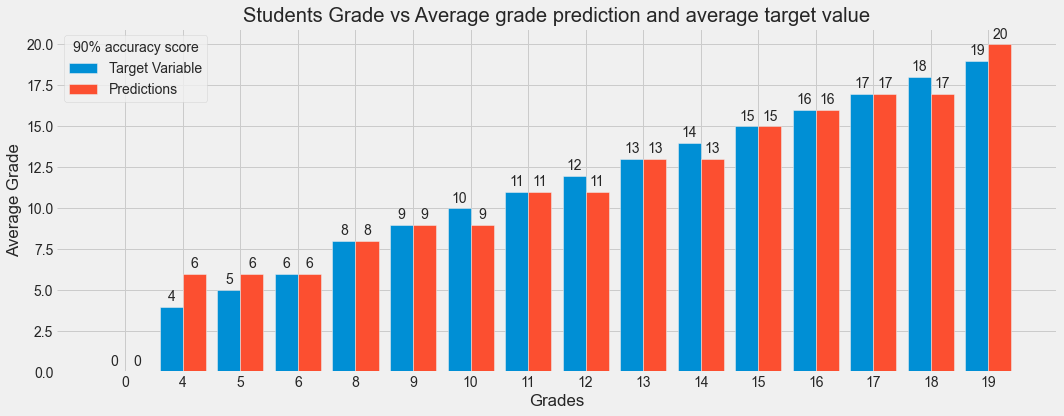

In [111]:
# create a dataframe for ground truth and prediction
pred_df = pd.DataFrame([prediction,np.round(prediction),y_test],
                       index=['prediction','round_pred','ground_truth'])

# pd.crosstab(pred_df['ground_truth'],pred_df['prediction'])
pred_df2 = pred_df.T.groupby('ground_truth').mean().reset_index()

pred_df2['prediction'] = pred_df2.apply(lambda x:np.round(x['prediction']),axis=1,result_type='expand')
pred_df2 = pred_df2.astype(int)

width = 0.4

fig,ax = plt.subplots(figsize=(15,6))

x_axis = np.arange(len(pred_df2['ground_truth']))

bar1 = plt.bar(x_axis - (width/2),pred_df2['ground_truth'],width,label='Target Variable')

bar2 = plt.bar(x_axis + (width/2),pred_df2['prediction'],width,label='Predictions')

ax.set_xticks(x_axis)
ax.set_xticklabels(pred_df2['ground_truth'])
ax.set_xlabel('Grades')
ax.set_ylabel('Average Grade')
ax.set_title('Students Grade vs Average grade prediction and average target value')
# removing the spines from the plot
ax.spines['left'].set_visible(False)


ax.legend(title='90% accuracy score')

def labeller(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')


labeller(bar1)
labeller(bar2)

fig.tight_layout()

plt.savefig('prediction_vs_gt',dpi=80)

## Plotting  `ground_truth` vs `prediction`

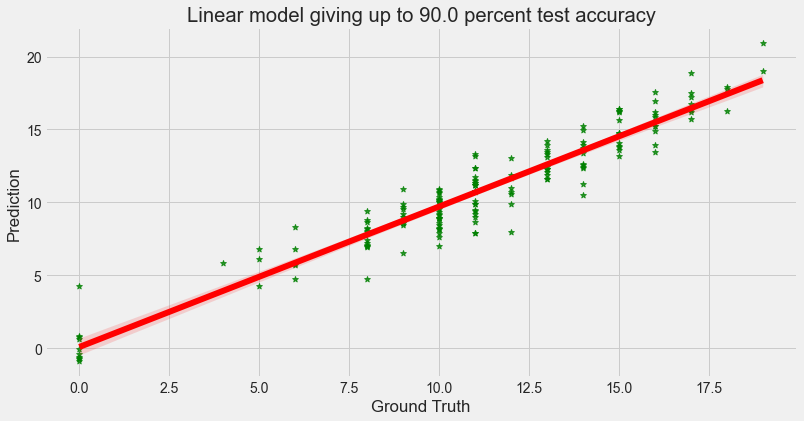

In [104]:
fig,ax = plt.subplots(figsize=(12,6))
sns.regplot(pred_df.loc['ground_truth',:],pred_df.loc['prediction',:],data=pred_df,color='g',line_kws={'color':'red'},marker='*');
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Linear model giving up to {} percent test accuracy'.format(np.round(lin_reg.score(X_test,y_test)*100)));
plt.savefig('ground_truth.png',bbox_inches='tight')

### Saving model for future use

In [105]:
import pickle

# save the model
with open('model/multi_linear_reg.sav','wb') as f:
     pickle.dump(lin_reg, f)

## Custom prediction

In [106]:
from predictor import Predictor

predict = Predictor('model/multi_linear_reg.sav','data/prep_df.csv',scaler)

In [107]:
first_grade = 5
second_grade = 4
absences = 0
index = 6

predict.get_prediction(first_grade,second_grade,absences,index)

2

In [108]:
# Establish a model
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
param_grid = {
    'alpha': 10.0 ** -np.arange(-0.1,5,0.1),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(model, param_grid,return_train_score=True)
clf.fit(X_train, y_train)
print("Best score: " + str(clf.best_score_))

Best score: 0.8218538968842347


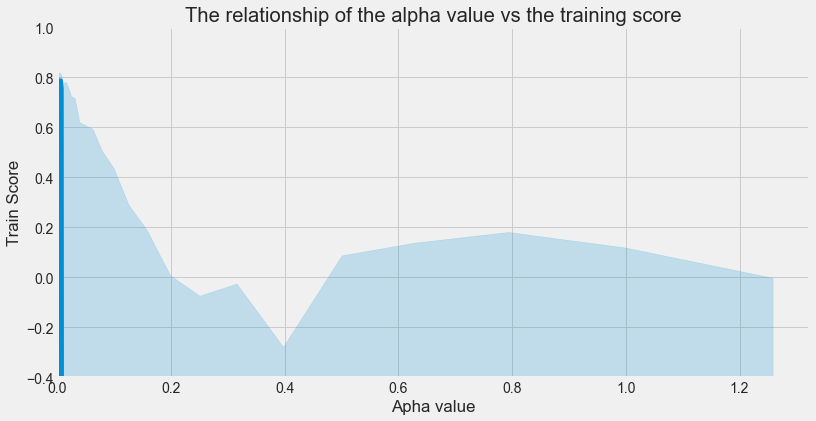

In [110]:

plt.subplots(figsize=(12,6))

ax = sns.lineplot((clf.cv_results_['param_alpha']).data,(clf.cv_results_['mean_train_score']))
ax.set_xlabel('Apha value')
ax.set_ylabel('Train Score')
ax.set_title('The relationship of the alpha value vs the training score')
plt.ylim(-0.4,1)
plt.xlim(0,)
plt.savefig('relationship.png',bbox_inches='tight')

In [ ]:
# clf.best_estimator_
# # 10 ** np.arange(-1,5,0.1)
# 10.0 ** -np.arange(-0.1,5,0.1)
# # (clf.cv_results_['param_alpha']).data
# from datetime import datetime as dt
# import pandas as pd

# dt.today() - pd.to_datetime('2024-09-27')